# Personal Challenge ICDM2 - Piccolo Giulio (Group 18)

# Operation Grace

### Giulio Piccolo - 874727

### dataset: "LastSenteces_Texas.csv" scraped from https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html

In [22]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
import os
print(os.listdir("/Users/giuliopiccolo/datasets/"))

['health_tx.xlsx', 'civilians_vs_officers.xlsx', 'LastSenteces_Texas.csv', '.ipynb_checkpoints', 'deaths_in_custody.xlsx', 'officers_vs_civilians.xlsx']


In [23]:
# opening dataframe
df = pd.read_csv("/Users/giuliopiccolo/datasets/LastSenteces_Texas.csv", encoding="latin1")
df.head()

,Execution,Link,Link.1,Last Name,First Name,TDCJNumber,Age,Date,Race,County
0,560,Offender Information,"Yes Sir, that will be five Dollars I love you,...",Coble,Billie,976,70,2/28/2019,White,McLennan
1,559,Offender Information,To my friends and family it was a nice journey...,Jennings,Robert,956,61,1/30/2019,Black,Harris
2,558,Offender Information,"Yes Sir, I would like to thank the Shape Commu...","Braziel, Jr.",Alvin,999393,43,12/11/2018,Black,Dallas
3,557,Offender Information,Yes Sir. Dear Heavenly Father please forgive t...,Garcia,Joseph,999441,47,12/04/2018,Hispanic,Dallas
4,556,Offender Information,I am very thankful for all the hard work the M...,Ramos,Robert,999062,64,11/14/2018,Hispanic,Hidalgo


# Descriptive statistic

## What is the age of people sentenced to death?

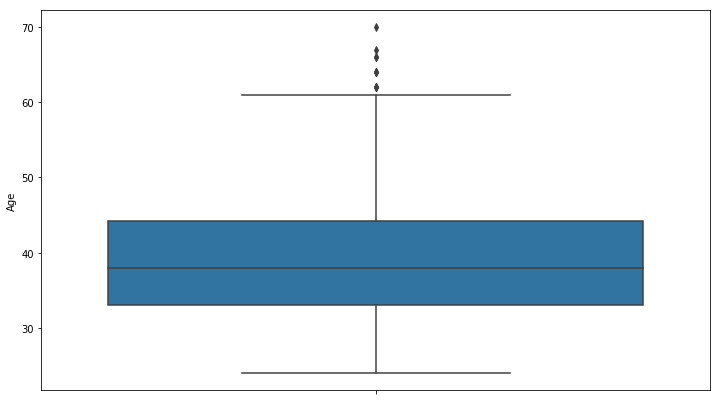

Minimum Age is 24
Maximum Age is 70
Average Age is 39.7


In [3]:
# plot boxplot of ages
plt.figure(figsize=(12,7))
sns.boxplot(y=df.Age)
plt.show()

print("Minimum Age is {}".format(df.Age.min()))
print("Maximum Age is {}".format(df.Age.max()))
print("Average Age is {:.1f}".format(df.Age.mean()))

We have 5 outliers which are data points that differs significantly from other observations. This means there's not an high dispersion because 5 outliers on 560 observations is not significant.

### How data features are correlated each others?

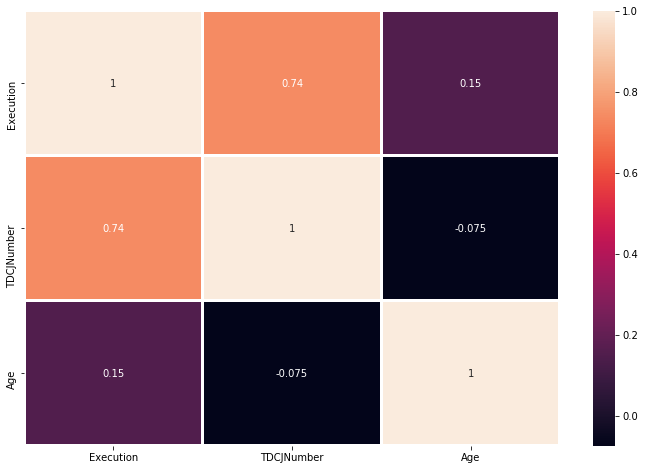

In [4]:
# I want to find correlation coefficent to see the grade of correlation between variables.
# TDCJNumber and Execution contain numeric value with a good correlation coefficent, 
#but since this work is based on words and lexical analysis I can drop them. 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), linewidths=2, annot=True)
plt.show()

Execution and TDCJNumber are higly correlated. Since these two features are not necessary for my project I can drop them. In other words they are highly correlated (74%) but usless to accomplish my project's scope.

In [5]:
#drop Execution and TDCJNumber as I explain above.
df.drop(["Execution","TDCJNumber"],axis=1, inplace=True)

In [6]:
# let's create age range bins
age_ranges = ["{0} - {1}".format(age, age + 10) for age in range(10, 100, 10)]
 
# pd.cut to segment and sort data values into bins  
# bins=   to define the number of equal-width bins in the range of x (in this first case all the ages between 10-20)
# labels=   to bin title I set before
df['age_range'] = pd.cut(x=df['Age'], bins=[10,20,30,40,50,60,70,80,90,100], labels=age_ranges)

#.size() , returns an int representing the number of elements inside the object
by_age = df.groupby('age_range').size() 
by_age

age_range
10 - 20       0
20 - 30      81
30 - 40     251
40 - 50     156
50 - 60      57
60 - 70      15
70 - 80       0
80 - 90       0
90 - 100      0
dtype: int64

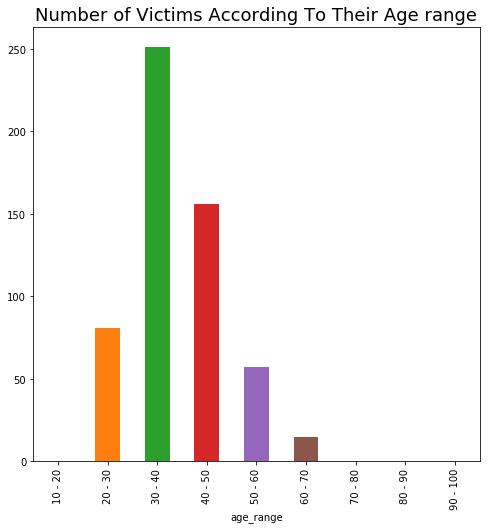

In [7]:
# and let's see it graphically
plt.figure(figsize=(8,8))
by_age.plot.bar()
plt.title ( 'Number of Victims According To Their Age range' ,fontsize = 18)
plt.show()

Text(0.5, 1.0, 'Age line Plot')

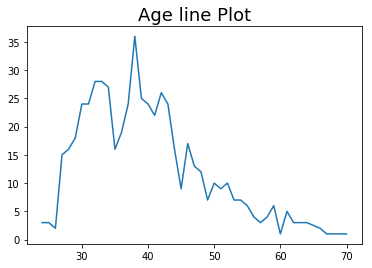

In [8]:
# Age line plot
df.Age.value_counts().sort_index().plot.line()
plt.title( 'Age line Plot' ,fontsize = 18)

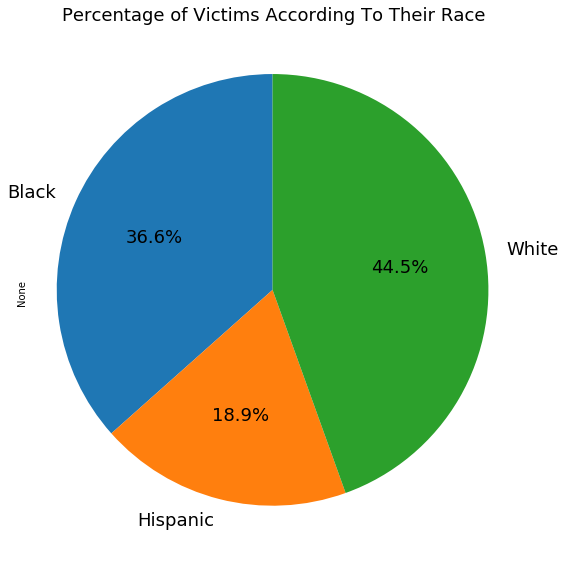

In [9]:
# grouping by race with their respective number size
most_common_race =  df.groupby('Race').size() 
# >2 because I noticed some spelling mistake inside dataframe 
most_common_race = most_common_race[most_common_race>2]
# decomment this line to see spelling mistake
#print(most_common_race)
# Pie chart of people senteced to death
plt.figure(figsize=(8,8))
most_common_race.plot.pie(y=['Black','Hispanic','White'],
           shadow=False,
           startangle=90,
           autopct='%1.1f%%',fontsize =18)

plt.axis('equal')
plt.title ( 'Percentage of Victims According To Their Race' ,fontsize = 18)
plt.tight_layout()
plt.show()



## Word Cloud

In [10]:
# Remove row in wich did not compare last statment pronounced by prisoners 
# 107 rows eliminated
# ~ means "bitwise". Output is all rows of df, which not contains "This offender declined to make" in column Link.1
df = df[ ~  df['Link.1'].str.contains("This offender declined to make")] 
df.head()

,Link,Link.1,Last Name,First Name,Age,Date,Race,County,age_range
0,Offender Information,"Yes Sir, that will be five Dollars I love you,...",Coble,Billie,70,2/28/2019,White,McLennan,60 - 70
1,Offender Information,To my friends and family it was a nice journey...,Jennings,Robert,61,1/30/2019,Black,Harris,60 - 70
2,Offender Information,"Yes Sir, I would like to thank the Shape Commu...","Braziel, Jr.",Alvin,43,12/11/2018,Black,Dallas,40 - 50
3,Offender Information,Yes Sir. Dear Heavenly Father please forgive t...,Garcia,Joseph,47,12/04/2018,Hispanic,Dallas,40 - 50
4,Offender Information,I am very thankful for all the hard work the M...,Ramos,Robert,64,11/14/2018,Hispanic,Hidalgo,60 - 70


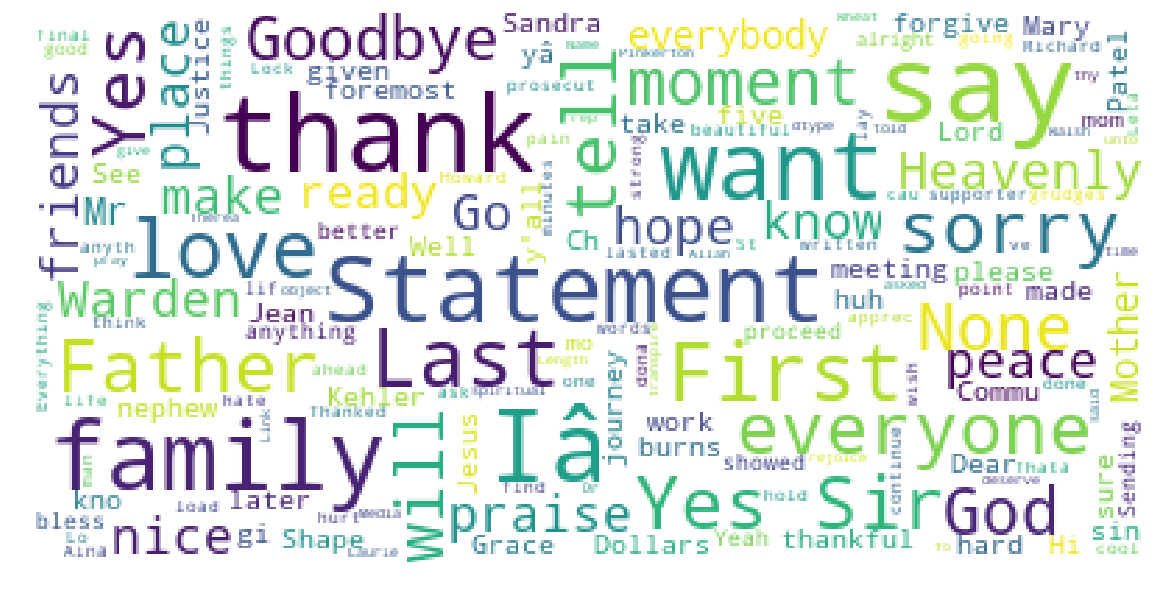

In [11]:
# word cloud of last staments  without cleaning
# I leave uncleaned code chuck to better show my following cleaning activity
from wordcloud import WordCloud, STOPWORDS
lastword = df["Link.1"]
wordcloud_q = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(lastword))
fig = plt.figure(1, figsize=(20,15))
plt.imshow(wordcloud_q)
plt.axis('off')
plt.show()

## Processing Strings: removing stop words and special characters

In [12]:
import nltk  # Natural Language Tool Kit
import re # Regular Expression tool
import string
from nltk.corpus import stopwords # importing 'stopwords'

statementList = list()
my_stopwords = ['offender','declined','statement','statemen','None']

# grouping words together the inflected forms of a word so they can be analysed as a single item
# Ex1 : am, are, is => be. Ex2 :  car, cars, car's, cars' => car
lemmatization = nltk.WordNetLemmatizer()
# iterating over each statement and do the following steps 
for lastword in df["Link.1"]:
    # first pass through a regular expression, thus to remove all the characters except small a-z or capital A-Z
    lastword = re.sub("[^a-zA-Z]"," ",lastword)
    # change the case to lower so all the dataset is in the same charachter format
    lastword = lastword.lower()
    # now let's tokenize strings. Converting each sentence into list of words so we can easily iterate and remove stop words.
    lastword = nltk.word_tokenize(lastword)
    # removing stop words. Let's make a loop which check weather each words it is a stop word or not
    # stopwords.words("english") is a builtin set of stop words from Stopwords library
    lastword = [i for i in lastword if not i in set(stopwords.words("english"))]
    # reomoving stop words which do not give any info
    lastword  = [word for word in lastword if word.lower() not in my_stopwords]
    # finally lemmatizing words 
    lastword = [lemmatization.lemmatize(i)for i in lastword]
    # again converting it into sentences
    # Firstly I converted senteces in a list of words using tokenize, now again I'm converting back into a sentences. 
    lastword = " ".join(lastword)
    # add a sentence into statement list which was firstly initialized 
    statementList.append(lastword)

In [13]:
statementList

['yes sir five dollar love love love mike love nelley love five dollar take care',
 'friend family nice journey family police officer hope find peace well stay safe enjoy life moment never get back',
 'yes sir would like thank shape community center support would like thank overseas italy france support death row prisoner would also like apologize lori second time husband dying hand white family tashell love finished warden may proceed',
 'yes sir dear heavenly father please forgive know',
 'thankful hard work mexican consulate put fight death sentence reason thankful humane treatment given prison getting gold watch took governor year forge thank god lord send chariot ready',
 'given',
 'thank love sandra nice meeting love ya good one killed christina whatever make ya happy love ya see side ya good ok warden ready',
 'l want make sure patel family know love like love make sure kid world know executed kid mentoring keep fight going good warden',
 'last',
 'everyone know love see side',


In [14]:
# let's combine all the senteces into a single string 
lastword = re.sub("[^a-zA-Z]"," ",str (statementList)  )
lastword

'  yes sir five dollar love love love mike love nelley love five dollar take care    friend family nice journey family police officer hope find peace well stay safe enjoy life moment never get back    yes sir would like thank shape community center support would like thank overseas italy france support death row prisoner would also like apologize lori second time husband dying hand white family tashell love finished warden may proceed    yes sir dear heavenly father please forgive know    thankful hard work mexican consulate put fight death sentence reason thankful humane treatment given prison getting gold watch took governor year forge thank god lord send chariot ready    given    thank love sandra nice meeting love ya good one killed christina whatever make ya happy love ya see side ya good ok warden ready    l want make sure patel family know love like love make sure kid world know executed kid mentoring keep fight going good warden    last    everyone know love see side    yes wou

In [15]:
# Tokenizing last word
lastword = nltk.word_tokenize(lastword)
lastword

['yes',
 'sir',
 'five',
 'dollar',
 'love',
 'love',
 'love',
 'mike',
 'love',
 'nelley',
 'love',
 'five',
 'dollar',
 'take',
 'care',
 'friend',
 'family',
 'nice',
 'journey',
 'family',
 'police',
 'officer',
 'hope',
 'find',
 'peace',
 'well',
 'stay',
 'safe',
 'enjoy',
 'life',
 'moment',
 'never',
 'get',
 'back',
 'yes',
 'sir',
 'would',
 'like',
 'thank',
 'shape',
 'community',
 'center',
 'support',
 'would',
 'like',
 'thank',
 'overseas',
 'italy',
 'france',
 'support',
 'death',
 'row',
 'prisoner',
 'would',
 'also',
 'like',
 'apologize',
 'lori',
 'second',
 'time',
 'husband',
 'dying',
 'hand',
 'white',
 'family',
 'tashell',
 'love',
 'finished',
 'warden',
 'may',
 'proceed',
 'yes',
 'sir',
 'dear',
 'heavenly',
 'father',
 'please',
 'forgive',
 'know',
 'thankful',
 'hard',
 'work',
 'mexican',
 'consulate',
 'put',
 'fight',
 'death',
 'sentence',
 'reason',
 'thankful',
 'humane',
 'treatment',
 'given',
 'prison',
 'getting',
 'gold',
 'watch',
 'took

In [16]:
# frequency of each word 
wordfreqdist = nltk.FreqDist(lastword)
# List of tuples
# get most 350 common words 
mostcommon = wordfreqdist.most_common(350)
# convert it into dict structure so I can create a word cloud 
mostcommon = dict((x, y) for x, y in mostcommon)
print (mostcommon)

{'love': 711, 'family': 335, 'know': 321, 'thank': 271, 'sorry': 256, 'want': 225, 'would': 223, 'god': 220, 'like': 215, 'say': 176, 'life': 162, 'hope': 150, 'forgive': 147, 'lord': 141, 'one': 140, 'going': 130, 'tell': 127, 'yes': 120, 'take': 119, 'ya': 116, 'people': 114, 'peace': 112, 'see': 111, 'go': 98, 'give': 98, 'heart': 97, 'jesus': 96, 'warden': 95, 'done': 87, 'friend': 86, 'keep': 85, 'let': 84, 'death': 83, 'father': 83, 'ready': 83, 'ask': 83, 'pain': 83, 'get': 80, 'strong': 80, 'right': 73, 'everybody': 73, 'time': 72, 'thing': 72, 'man': 71, 'come': 69, 'u': 69, 'year': 68, 'find': 65, 'care': 62, 'brother': 61, 'stay': 60, 'please': 60, 'pray': 59, 'back': 58, 'day': 58, 'got': 57, 'home': 57, 'make': 55, 'forgiveness': 55, 'caused': 55, 'could': 54, 'never': 53, 'always': 53, 'mom': 53, 'first': 51, 'sir': 50, 'good': 50, 'way': 50, 'may': 49, 'everyone': 49, 'christ': 47, 'sister': 47, 'loved': 47, 'everything': 46, 'support': 45, 'apologize': 44, 'bless': 44, 

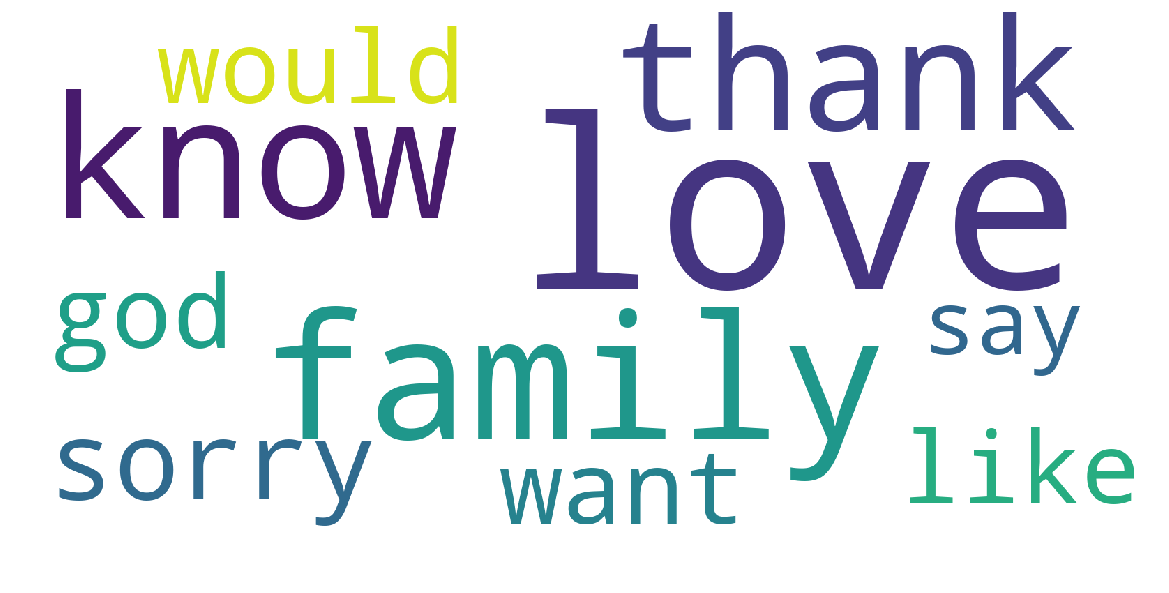

In [17]:
#words cloud for most frequent 10 word
wordcloud_q = WordCloud(width=1600, height=800,
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=10,
 
                     
                         ).generate_from_frequencies(mostcommon)
fig = plt.figure(1, figsize=(20,20))
plt.imshow(wordcloud_q)
plt.axis('off')

plt.show()

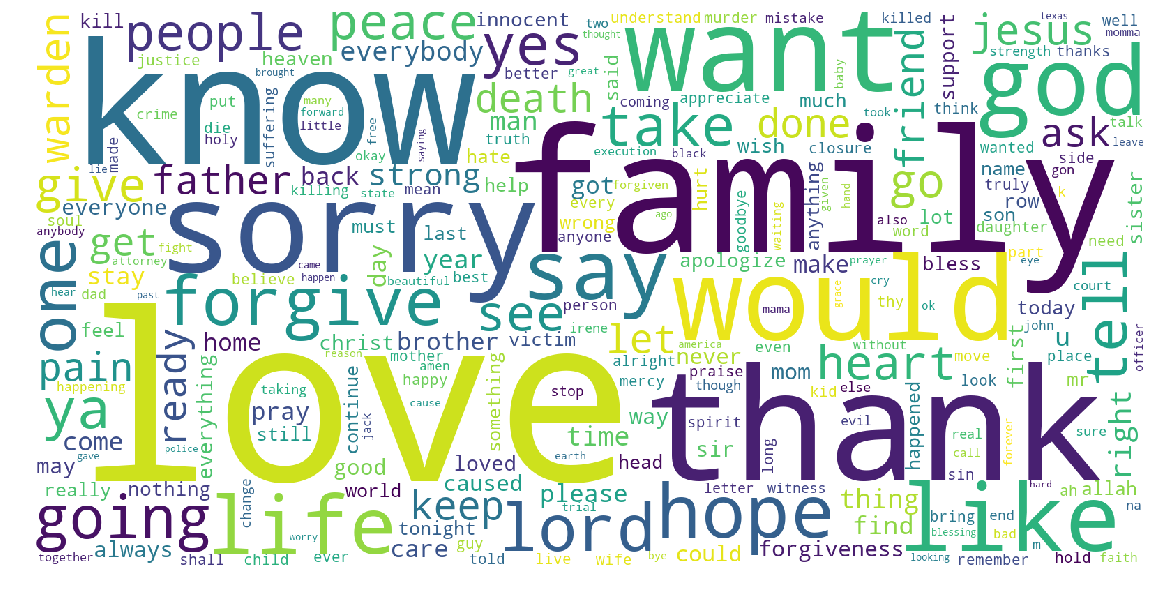

In [18]:
#words cloud for most 250 frequent word
wordcloud_q = WordCloud(width=1600, height=800,
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=250,
 
                     
                         ).generate_from_frequencies(mostcommon)
fig = plt.figure(1, figsize=(20,20))
plt.imshow(wordcloud_q)
plt.axis('off')

plt.show()

# Sentiment Analysis with TextBlob 

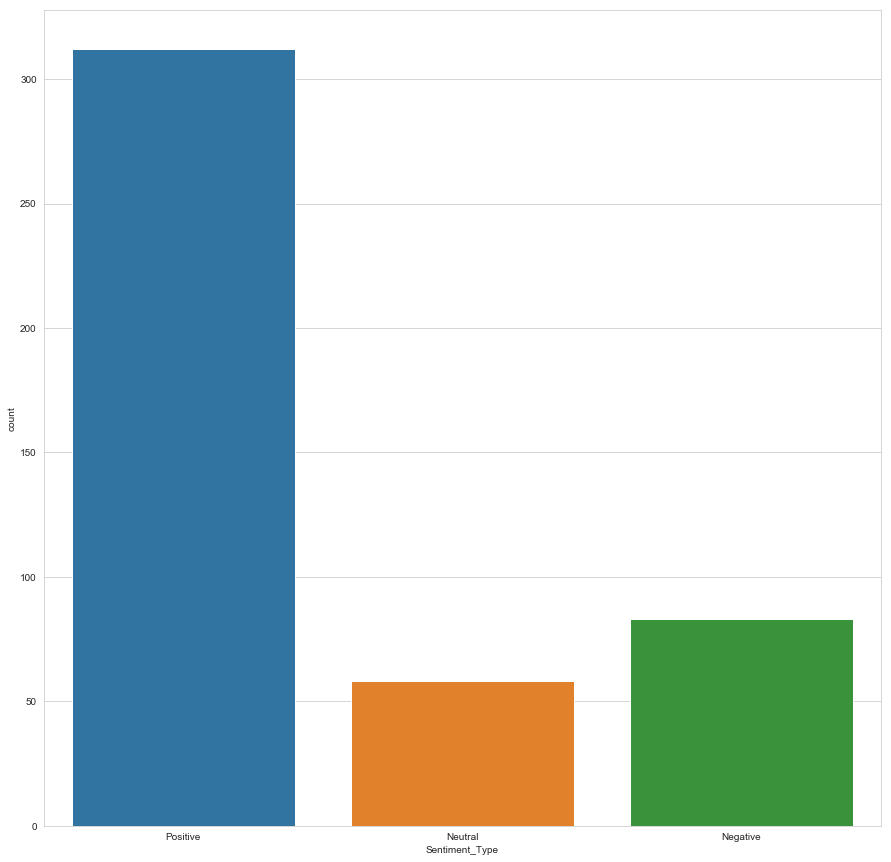

In [20]:
from textblob import TextBlob
# text blob library to check weather the sentece is neutral(0) positive(>0) or negative(<=) 
bloblist_tags = list()

# for each sentence in statementList do the following steps 
for row in statementList:
    blob = TextBlob(row)
    #sentiment polarity and subjectivity (builtin functions of textblob)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_last_sentence = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])

# defining a function which checks the sentiment of a sentence and returns back a label per sentiment 
def f_tags(df_last_sentence):
    if df_last_sentence['sentiment'] > 0:
        val = "Positive"
    elif df_last_sentence['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

# applying this function and save it into new column sentiment type
df_last_sentence['Sentiment_Type'] = df_last_sentence.apply(f_tags, axis=1)

# let's plot what I find out with the application of the previous function
plt.figure(figsize=(15,15))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_last_sentence)

In [24]:
df_last_sentence

,sentence,sentiment,polarity,Sentiment_Type
0,yes sir five dollar love love love mike love n...,0.500000,0.600000,Positive
1,friend family nice journey family police offic...,0.375000,0.500000,Positive
2,yes sir would like thank shape community cente...,0.100000,0.175000,Positive
3,yes sir dear heavenly father please forgive know,0.000000,0.000000,Neutral
4,thankful hard work mexican consulate put fight...,-0.030556,0.347222,Negative
5,given,0.000000,0.000000,Neutral
6,thank love sandra nice meeting love ya good on...,0.480000,0.600000,Positive
7,l want make sure patel family know love like l...,0.540000,0.715556,Positive
8,last,0.000000,0.066667,Neutral
9,everyone know love see side,0.500000,0.600000,Positive
